In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
# Opening up the files
with open("../data/my_pickled_data.pkl","rb") as file:
    data_list=pickle.load(file)

In [3]:
X_train_2label=data_list[0]
y_train_2label=data_list[1]
X_test_2label=data_list[2]
y_test_2label=data_list[3]

X_train_undersampled = pd.read_csv("../data/X_train_undersampling.csv")
X_train_undersampled = X_train_undersampled.iloc[:, 1:]
y_train_undersampled = pd.read_csv("../data/y_train_undersampling.csv")['Credit_Status']

## RFC without feat. selection

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create an instance of the RFC.
rfc = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed.

# Fit the RFC to training data.
rfc.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on test data.
y_pred_2label = rfc.predict(X_test_2label)

# Generate a classification report.
report = classification_report(y_test_2label, y_pred_2label)
print(report)

              precision    recall  f1-score   support

         Bad       0.04      0.63      0.08       178
        Good       0.99      0.66      0.79      7034

    accuracy                           0.65      7212
   macro avg       0.52      0.65      0.44      7212
weighted avg       0.96      0.65      0.77      7212



In [5]:
rfc_plot = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)  # You can adjust other hyperparameters as needed.

# Fit the RFC to training data.
rfc_plot.fit(X_train_2label, y_train_2label)

RandomForestClassifier(max_depth=3, random_state=42)

Tree plotting and important features

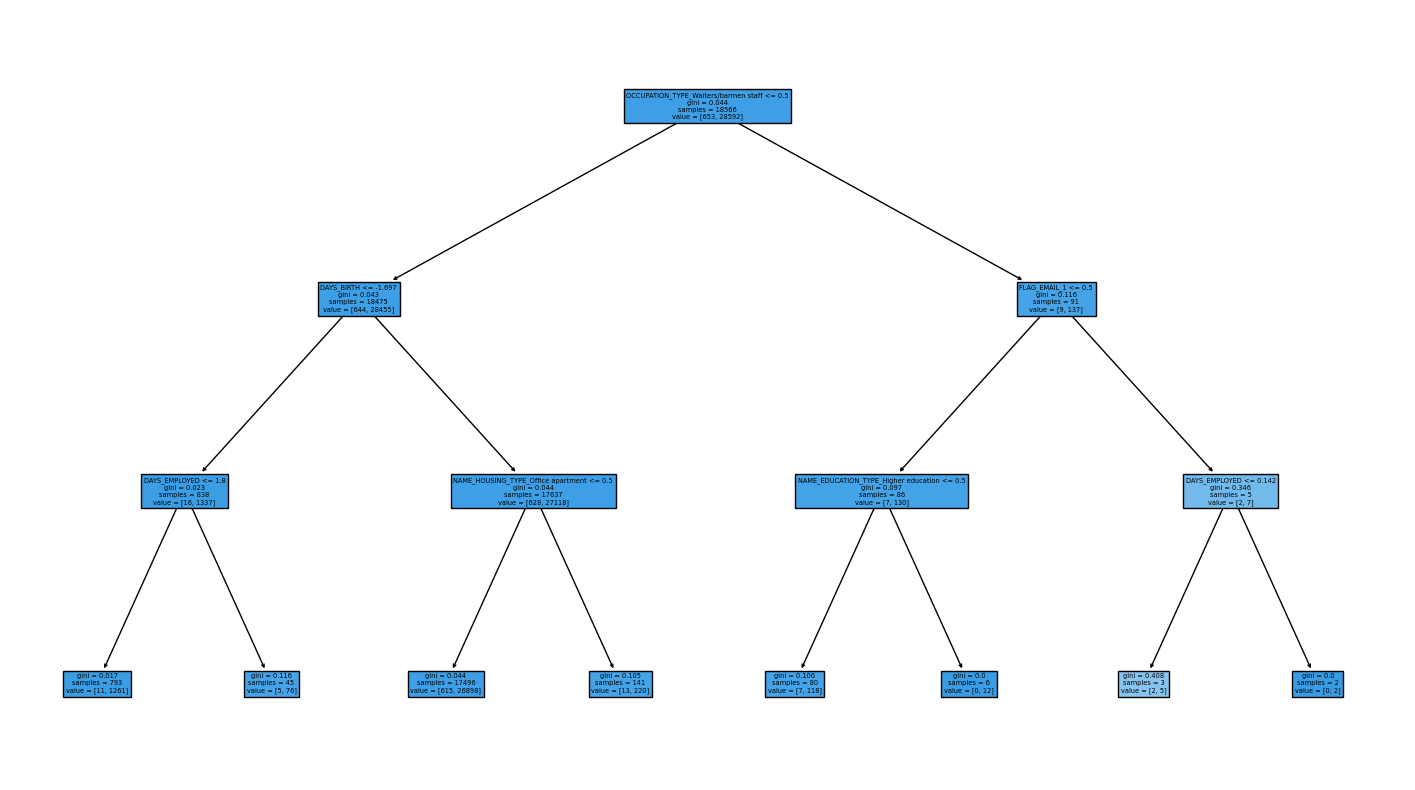

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import os

# Access one of the decision trees from the Random Forest (e.g., the first one)
tree_to_visualize = rfc_plot.estimators_[0] 

plt.figure(figsize=(18, 10))

# Plot the decision tree
tree.plot_tree(tree_to_visualize, filled=True, feature_names=X_test_2label.columns.tolist())

# Create the 'plots' directory if it doesn't exist
output_folder = '../plots/'
os.makedirs(output_folder, exist_ok=True)

# Save the plot in the 'plots' directory as 'decision_tree.png'
output_path = os.path.join(output_folder, 'decision_tree.png')
plt.savefig(output_path)

# Show the plot
plt.show()

Text version

In [15]:
from sklearn.tree import export_text

# Access one of the decision trees from the Random Forest (e.g., the first one)
tree_to_visualize = rfc.estimators_[0]  # Replace 0 with the index of the tree you want to visualize

# Extract the decision tree as text
tree_text = export_text(tree_to_visualize, feature_names=X_test_2label.columns.tolist())

# Print or use the tree text
print(tree_text)

|--- NAME_EDUCATION_TYPE_Higher education <= 1.00
|   |--- FLAG_EMAIL_1 <= 1.00
|   |   |--- CNT_FAM_MEMBERS <= -1.31
|   |   |   |--- NAME_EDUCATION_TYPE_Higher education <= 0.00
|   |   |   |   |--- OCCUPATION_TYPE_Security staff <= 0.01
|   |   |   |   |   |--- NAME_FAMILY_STATUS_Widow <= 1.00
|   |   |   |   |   |   |--- FLAG_OWN_REALTY_N <= 0.01
|   |   |   |   |   |   |   |--- NAME_INCOME_TYPE_State servant <= 0.01
|   |   |   |   |   |   |   |   |--- OCCUPATION_TYPE_High skill tech staff <= 0.04
|   |   |   |   |   |   |   |   |   |--- NAME_FAMILY_STATUS_Widow <= 0.03
|   |   |   |   |   |   |   |   |   |   |--- NAME_INCOME_TYPE_Commercial associate <= 0.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |   |--- NAME_INCOME_TYPE_Commercial associate >  0.96
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |--- NAME_FAMILY_STATUS_Widow >  0.03
|   |  

c:\Users\lisal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


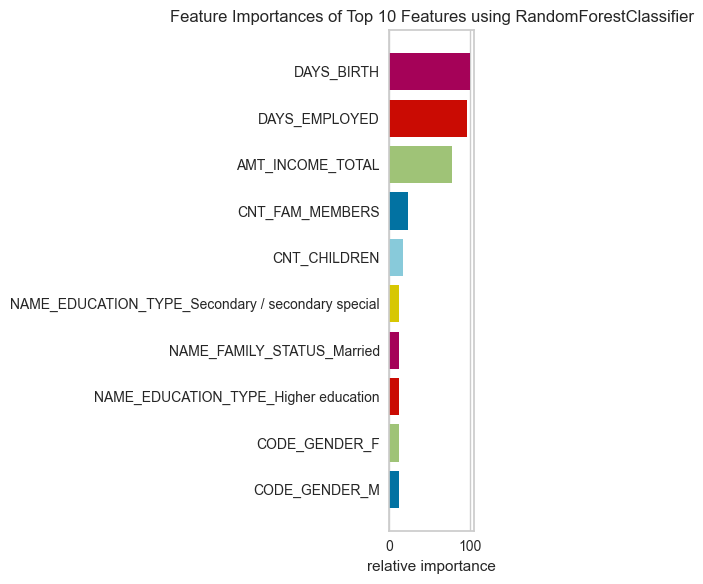

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [7]:
import matplotlib.pyplot as plt
from yellowbrick.model_selection import FeatureImportances

# Create a larger figure size
plt.figure(figsize=(5, 6))

# Create and fit the visualizer
visualizer = FeatureImportances(rfc, topn=10)  # Specify topn=10 for the top 10 features
visualizer.fit(X_train_2label, y_train_2label)

# Finalize the plot
visualizer.show()

### Model Evaluation wo feat selection

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, f1_score, auc, ConfusionMatrixDisplay

#### Confusion Matrix

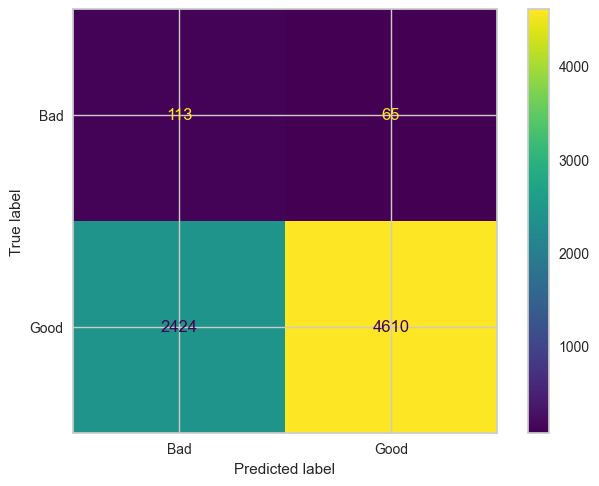

In [9]:
cm = confusion_matrix(y_test_2label, y_pred_2label)
cm_display_rfc = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good'])
cm_display_rfc.plot()
plt.show()

#### AUC-ROC

In [11]:
# Score

rfc_probs = rfc.predict_proba(X_test_2label)
rfc_probs = rfc_probs[:,1] # keeping probabilities for the positive outcome ?? probabilities that the model assigned to the examples being positive
rfc_auc = roc_auc_score(y_test_2label, rfc_probs)
print(f"ROC-AUC score: {round(rfc_auc, 3)}")


ROC-AUC score: 0.699


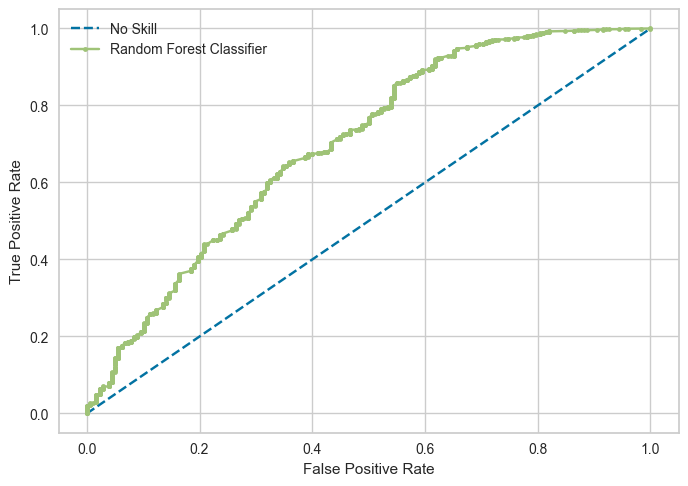

In [12]:
# AUC-ROC Plot 

y_test_2label_binary = y_test_2label.replace(['Bad', 'Good'], [0, 1]) # label 0 for bad, label 1 for good

rfc_fpr, rfc_tpr, _ = roc_curve(y_test_2label_binary, rfc_probs)

# to get the no skill line
ns_probs = [0 for _ in range(len(y_test_2label))]
ns_fpr, ns_tpr, _ = roc_curve(y_test_2label_binary, ns_probs)

#plotting
plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = "No Skill")
plt.plot(rfc_fpr, rfc_tpr, marker = '.', label = "Random Forest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Precision-Recall Curve

In [13]:
# Precision recall score 

y_pred_2label_binary = [0 if p == 'Bad' else 1 for p in y_pred_2label] # label 0 for bad, label 1 for good

rfc_precision, rfc_recall, _ = precision_recall_curve(y_test_2label_binary, rfc_probs)
rfc_f1, rfc_auc = f1_score(y_test_2label_binary, y_pred_2label_binary), auc(rfc_recall, rfc_precision)
print(f"f1-score: {round(rfc_f1, 3)}\nauc={round(rfc_auc, 3)}")

f1-score: 0.787
auc=0.987


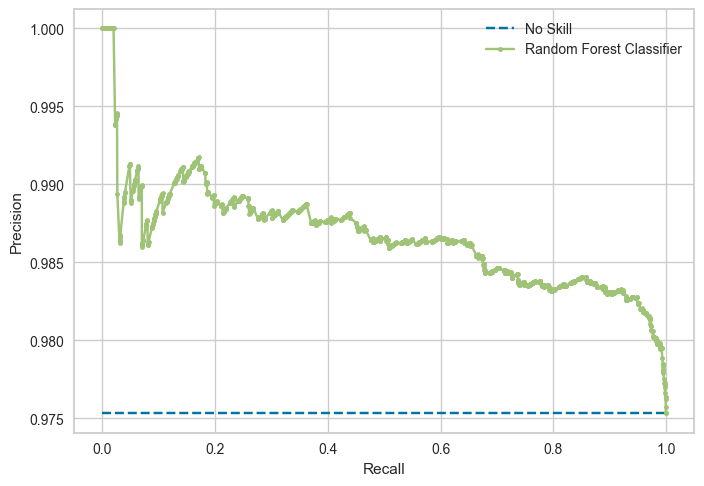

In [14]:
# Precision- Recall curve 
no_skill = len(y_test_2label_binary[y_test_2label_binary==1])/len(y_test_2label_binary)
plt.plot([0,1], [no_skill, no_skill], linestyle = '--', label = 'No Skill')
plt.plot(rfc_recall, rfc_precision, marker = '.', label = "Random Forest Classifier")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

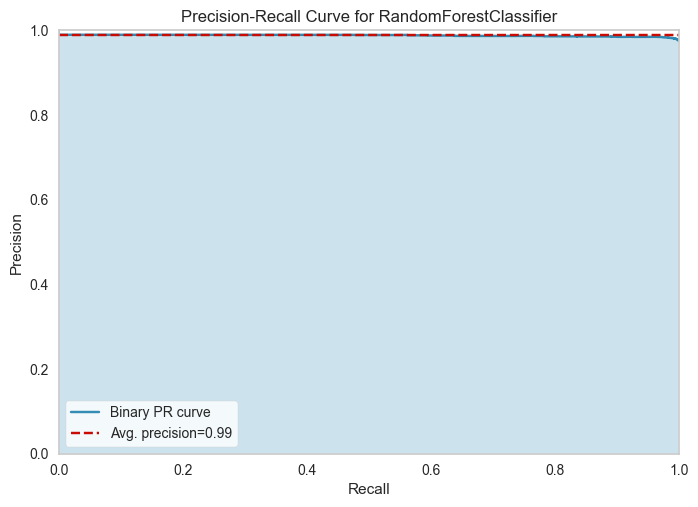

In [23]:
from yellowbrick.classifier import precision_recall_curve # this gives a clearer PR-curve but has the same function name as sklearn.metrics.precision_recall_curve
y_train_2label_binary = y_train_2label.replace(['Bad', 'Good'], [0, 1])
viz_rfc = precision_recall_curve(RandomForestClassifier(n_estimators=100, random_state=42), X_train_2label, y_train_2label_binary, X_test_2label, y_test_2label_binary)

# This PR curve and the one above should be showing the same thing except that the one on top is 'zoomed in'.